In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [4]:
df= pd.read_csv("incident_event_log.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [4]:
df.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [52]:
df['incident_state'].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [5]:
print("\nBasic statistics:")
print(df.describe(include='all'))


Basic statistics:
            number incident_state  active  reassignment_count   reopen_count  \
count       141712         141712  141712       141712.000000  141712.000000   
unique       24918              9       2                 NaN            NaN   
top     INC0019396         Active    True                 NaN            NaN   
freq            58          38716  116726                 NaN            NaN   
mean           NaN            NaN     NaN            1.104197       0.021918   
std            NaN            NaN     NaN            1.734673       0.207302   
min            NaN            NaN     NaN            0.000000       0.000000   
25%            NaN            NaN     NaN            0.000000       0.000000   
50%            NaN            NaN     NaN            1.000000       0.000000   
75%            NaN            NaN     NaN            1.000000       0.000000   
max            NaN            NaN     NaN           27.000000       8.000000   

        sys_mod_coun

In [6]:
# unique cases

In [8]:
print("\nNumber of unique tickets (cases):", df['number'].nunique())


Number of unique tickets (cases): 24918


In [11]:
# Rename the column name number to case_id

In [9]:
df.rename(columns={'number': 'case_id'}, inplace=True)

In [10]:
print("\nNumber of unique tickets (cases):", df['case_id'].nunique())


Number of unique tickets (cases): 24918


In [12]:
# Events per case id

In [15]:
events_per_ticket = df.groupby('case_id').size()
print("\nEvents per ticket stats:")
print(events_per_ticket.describe())


Events per ticket stats:
count    24918.000000
mean         5.687134
std          3.677845
min          2.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         58.000000
dtype: float64


In [23]:
# Create the counts series
counts = df.groupby('case_id').size()

# Filter for tickets with more than, say, 30 events
heavy_hitters = counts[counts > 30].sort_values(ascending=False)
print(heavy_hitters)
heavy_hitter_ids = counts[counts > 30].index
print(heavy_hitter_ids)
type(heavy_hitter_ids)

case_id
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
INC0025734    43
INC0007349    43
INC0012815    40
INC0003419    38
INC0032450    38
INC0020849    38
INC0015902    37
INC0002129    36
INC0019739    35
INC0010322    34
INC0003256    33
INC0009986    33
INC0007229    33
INC0025696    33
INC0004305    33
INC0026226    33
INC0012879    32
INC0011262    32
INC0025234    32
INC0031099    32
INC0020627    31
INC0025993    31
INC0003982    31
INC0012895    31
dtype: int64
Index(['INC0002129', 'INC0003256', 'INC0003419', 'INC0003982', 'INC0004305',
       'INC0005927', 'INC0007229', 'INC0007349', 'INC0009986', 'INC0010322',
       'INC0011206', 'INC0011262', 'INC0012815', 'INC0012879', 'INC0012895',
       'INC0015902', 'INC0019396', 'INC0019739', 'INC0020627', 'INC0020718',
       'INC0020849', 'INC0025234', 'INC0025696', 'INC0025734', 'INC0025993',
       'INC0026226', 'INC0031099', 'INC0032450', 'INC0044260'],
      dtype='object', name='case_id')

pandas.core.indexes.base.Index

In [25]:
outlier_ticket = df[df['case_id'].isin (heavy_hitter_ids)]
print(outlier_ticket)

           case_id      incident_state  active  reassignment_count  \
9221    INC0002129                 New    True                   0   
9222    INC0002129              Active    True                   0   
9223    INC0002129            Resolved    True                   0   
9224    INC0002129              Active    True                   0   
9225    INC0002129              Active    True                   0   
...            ...                 ...     ...                 ...   
140151  INC0044260  Awaiting User Info    True                   6   
140152  INC0044260  Awaiting User Info    True                   6   
140153  INC0044260  Awaiting User Info    True                   6   
140154  INC0044260            Resolved    True                   6   
140155  INC0044260              Closed   False                   6   

        reopen_count  sys_mod_count  made_sla    caller_id      opened_by  \
9221               0              0      True  Caller 2903              ?   
9222 

In [26]:
outlier_ticket['case_id'].nunique()

29

In [29]:
print(outlier_ticket['incident_state'].value_counts())

incident_state
Active                586
Awaiting User Info    224
New                   137
Resolved               94
Closed                 30
Awaiting Vendor         9
Awaiting Evidence       1
Name: count, dtype: int64


In [31]:
print(outlier_ticket.groupby('case_id').size().sort_values(ascending=False).head(1))

case_id
INC0019396    58
dtype: int64


In [32]:
single_story = outlier_ticket[outlier_ticket['case_id'] == 'INC0019396']
print(single_story)

          case_id      incident_state  active  reassignment_count  \
81418  INC0019396                 New    True                   0   
81419  INC0019396                 New    True                   0   
81420  INC0019396            Resolved    True                   0   
81421  INC0019396              Active    True                   0   
81422  INC0019396              Active    True                   0   
81423  INC0019396              Active    True                   0   
81424  INC0019396              Active    True                   0   
81425  INC0019396              Active    True                   0   
81426  INC0019396              Active    True                   0   
81427  INC0019396              Active    True                   1   
81428  INC0019396              Active    True                   2   
81429  INC0019396              Active    True                   3   
81430  INC0019396              Active    True                   4   
81431  INC0019396              Act

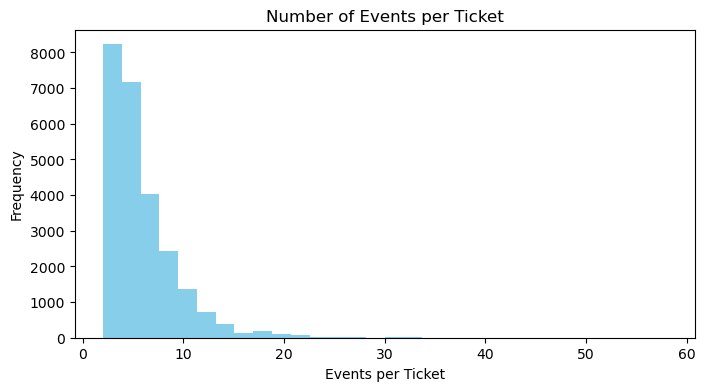

In [33]:
plt.figure(figsize=(8,4))
plt.hist(events_per_ticket, bins=30, color='skyblue')
plt.title('Number of Events per Ticket')
plt.xlabel('Events per Ticket')
plt.ylabel('Frequency')
plt.show()

In [35]:
df.columns

Index(['case_id', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [36]:
# Convert timestamp

In [39]:
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['resolved_at'] = pd.to_datetime(df['resolved_at'], dayfirst=True, errors='coerce')

In [40]:
# Compute resolution time

In [41]:
df['resolution_hours'] = (
    df['resolved_at'] - df['opened_at']
).dt.total_seconds() / 3600


In [42]:
# Inspect distribution

count    138571.000000
mean        269.596262
std         650.867377
min           0.000000
25%           4.066667
50%          73.516667
75%         262.183333
max        8070.166667
Name: resolution_hours, dtype: float64


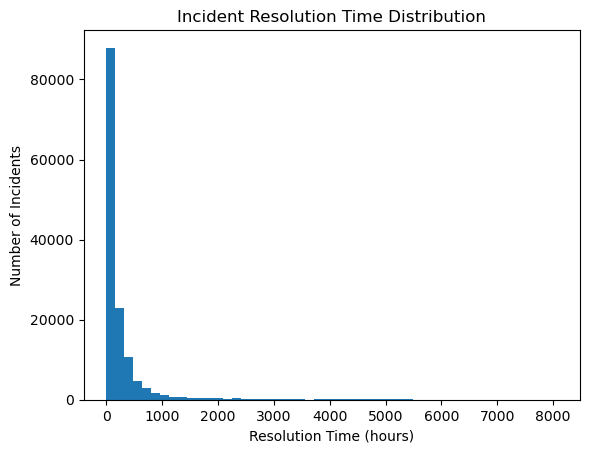

In [43]:
print(df['resolution_hours'].describe())

plt.hist(df['resolution_hours'].dropna(), bins=50)
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Number of Incidents')
plt.title('Incident Resolution Time Distribution')
plt.show()

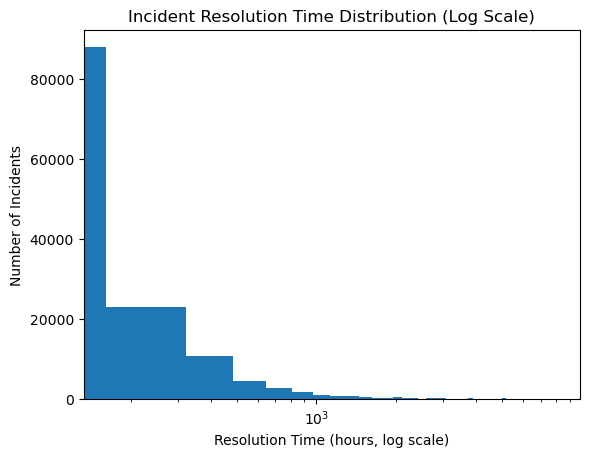

In [44]:
plt.hist(df['resolution_hours'].dropna(), bins=50)
plt.xscale('log')
plt.xlabel('Resolution Time (hours, log scale)')
plt.ylabel('Number of Incidents')
plt.title('Incident Resolution Time Distribution (Log Scale)')
plt.show()


In [45]:
df[df['resolution_hours'] > 2000][
    ['resolution_hours', 'priority', 'incident_state']
].head()

,resolution_hours,priority,incident_state
858,6473.85,4 - Low,Active
859,6473.85,4 - Low,Awaiting User Info
860,6473.85,4 - Low,Awaiting User Info
861,6473.85,4 - Low,Resolved
862,6473.85,4 - Low,Closed


In [53]:
df['made_sla'].value_counts()

made_sla
True     132497
False      9215
Name: count, dtype: int64

In [54]:
df['made_sla'].value_counts(normalize=True) * 100


made_sla
True     93.497375
False     6.502625
Name: proportion, dtype: float64

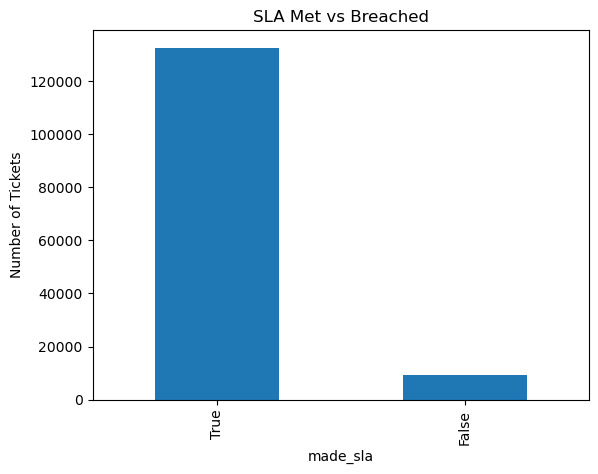

In [55]:
import matplotlib.pyplot as plt

df['made_sla'].value_counts().plot(kind='bar')
plt.title('SLA Met vs Breached')
plt.ylabel('Number of Tickets')
plt.show()

# STAGE 1 — Rule-based SLA risk detection

In [61]:
#Step 1: Rule 1-Inspect priority values

In [56]:
df['priority'].value_counts()

priority
3 - Moderate    132452
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: count, dtype: int64

In [58]:
df['rule_high_priority'] = df['priority'].isin(['1 - Critical', '2 - High'])

In [59]:
df['rule_high_priority']

0         False
1         False
2         False
3         False
4         False
          ...  
141707    False
141708    False
141709    False
141710    False
141711    False
Name: rule_high_priority, Length: 141712, dtype: bool

In [60]:
pd.crosstab(df['rule_high_priority'], df['made_sla'])

made_sla,False,True
rule_high_priority,,
False,8544,127938
True,671,4559


In [62]:
# Step 2: Rule 2- Adding one more rule- Too many reassignments = risk- because
# Reassignments introduce waiting
# Waiting eats SLA time
# Still explainable, still non-ML

In [63]:
df['reassignment_count'].describe()

count    141712.000000
mean          1.104197
std           1.734673
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          27.000000
Name: reassignment_count, dtype: float64

In [66]:
df['reassignment_count'].value_counts().head(10)

reassignment_count
0    69876
1    37104
2    15097
3     8274
4     4614
5     2595
6     1447
7      985
8      574
9      365
Name: count, dtype: int64

In [67]:
df['rule_many_reassignments'] = df['reassignment_count'] >= 3

In [68]:
pd.crosstab(df['rule_many_reassignments'], df['made_sla'])

made_sla,False,True
rule_many_reassignments,,
False,7046,115031
True,2169,17466


In [69]:
# Combine rules-High priority OR many reassignments-“Escalate if it’s critical OR clearly stuck.”

In [70]:
df['rule_priority_or_reassign'] = (
    df['rule_high_priority'] | df['rule_many_reassignments']
)

pd.crosstab(df['rule_priority_or_reassign'], df['made_sla'])

made_sla,False,True
rule_priority_or_reassign,,
False,6478,111250
True,2737,21247


# Stage 2 KPIs

In [71]:
# 2.1 Stage 2.1 — Ticket Age as a KPI

In [72]:
# Step 1- Compute total ticket age (hours)

In [73]:
df['opened_at'] = pd.to_datetime(df['opened_at'], dayfirst=True, errors='coerce')
df['resolved_at'] = pd.to_datetime(df['resolved_at'], dayfirst=True, errors='coerce')

df['ticket_age_hours'] = (
    df['resolved_at'] - df['opened_at']
).dt.total_seconds() / 3600


In [74]:
df['ticket_age_hours'].describe()

count    138571.000000
mean        269.596262
std         650.867377
min           0.000000
25%           4.066667
50%          73.516667
75%         262.183333
max        8070.166667
Name: ticket_age_hours, dtype: float64

In [75]:
bins = [0, 4, 8, 16, 24, 48, 72, 168, 5000]
labels = ['0–4h', '4–8h', '8–16h', '16–24h',
          '1–2d', '2–3d', '3–7d', '7d+']

df['age_bucket'] = pd.cut(
    df['ticket_age_hours'],
    bins=bins,
    labels=labels,
    right=False
)


In [76]:
df['age_bucket']

0         8–16h
1         8–16h
2         8–16h
3         8–16h
4          1–2d
          ...  
141707     0–4h
141708     0–4h
141709     0–4h
141710     0–4h
141711     0–4h
Name: age_bucket, Length: 141712, dtype: category
Categories (8, object): ['0–4h' < '4–8h' < '8–16h' < '16–24h' < '1–2d' < '2–3d' < '3–7d' < '7d+']

In [77]:
breach_by_age = (
    df.groupby('age_bucket')['made_sla']
      .apply(lambda x: (x == False).mean() * 100)
)

breach_by_age


C:\Users\baska\AppData\Local\Temp\ipykernel_42932\1503013823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bucket')['made_sla']


age_bucket
0–4h       1.899632
4–8h       2.908745
8–16h      4.137631
16–24h     2.580743
1–2d       3.049404
2–3d       3.626168
3–7d       8.826641
7d+       11.150725
Name: made_sla, dtype: float64

In [84]:
df['incident_state'].value_counts()

incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: count, dtype: int64

In [85]:
import pandas as pd
import numpy as np


In [88]:
WAITING_STATES = [
    'Awaiting User Info',
    'Awaiting Vendor',
    'Awaiting Problem',
    'Awaiting Evidence'
]

In [90]:
df['opened_at'] = pd.to_datetime(df['opened_at'], dayfirst=True, errors='coerce')
df['sys_created_at'] = pd.to_datetime(df['sys_created_at'], dayfirst=True, errors='coerce')

In [91]:
df['hours_since_open'] = (
    df['sys_created_at'] - df['opened_at']
).dt.total_seconds() / 3600


In [92]:
# Step 4️⃣ Flag early waiting events (≤ 48 hours)

In [93]:
df['early_waiting_event'] = (
    df['incident_state'].isin(WAITING_STATES)
    & (df['hours_since_open'] <= 48)
)


In [95]:
df['early_waiting_event'].head(5)

0    False
1    False
2    False
3    False
4    False
Name: early_waiting_event, dtype: bool

In [96]:
ticket_level = (
    df.groupby('case_id')
      .agg(
          early_waiting=('early_waiting_event', 'any'),
          made_sla=('made_sla', 'first')
      )
      .reset_index()
)


In [97]:
ticket_level

,case_id,early_waiting,made_sla
0,INC0000045,False,True
1,INC0000047,True,True
2,INC0000057,False,True
3,INC0000060,False,True
4,INC0000062,False,True
...,...,...,...
24913,INC0120304,False,True
24914,INC0120319,False,True
24915,INC0120495,False,True
24916,INC0120835,False,True


In [98]:
pd.crosstab(
    ticket_level['early_waiting'],
    ticket_level['made_sla']
)


made_sla,False,True
early_waiting,,
False,0,20643
True,1,4274


In [99]:
# 2️⃣ Column-wise percentages (BUSINESS VIEW)

In [100]:
pd.crosstab(
    ticket_level['early_waiting'],
    ticket_level['made_sla'],
    normalize='columns'
) * 100


made_sla,False,True
early_waiting,,
False,0.0,82.847052
True,100.0,17.152948


In [101]:
# Row-wise percentages (OPERATIONAL VIEW)

In [102]:
pd.crosstab(
    ticket_level['early_waiting'],
    ticket_level['made_sla'],
    normalize='index'
) * 100


made_sla,False,True
early_waiting,,
False,0.000000,100.000000
True,0.023392,99.976608


# 🟢 Stage 2.4 — Combine Two Leading KPIs

In [103]:
# 2nd KPI reassignment count

In [104]:
df['high_reassignment'] = df['reassignment_count'] >= 2


In [105]:
df['early_waiting_event'] = (
    df['incident_state'].isin(WAITING_STATES)
    & (df['hours_since_open'] <= 48)
)


In [107]:
# 4️⃣ Combine them at EVENT level (still simple)

In [106]:
df['early_waiting_and_reassign'] = (
    df['early_waiting_event'] & df['high_reassignment']
)


In [108]:
# 5️⃣ Collapse to TICKET level (same pattern as before)

In [109]:
ticket_level_combo = (
    df.groupby('case_id')
      .agg(
          risky_combo=('early_waiting_and_reassign', 'any'),
          made_sla=('made_sla', 'first')
      )
      .reset_index()
)


In [110]:
# 6️⃣ Evaluate with confusion matrix (counts)

In [111]:
pd.crosstab(
    ticket_level_combo['risky_combo'],
    ticket_level_combo['made_sla']
)


made_sla,False,True
risky_combo,,
False,1,23554
True,0,1363


In [112]:
pd.crosstab(
    ticket_level_combo['risky_combo'],
    ticket_level_combo['made_sla'],
    normalize='columns'
) * 100


made_sla,False,True
risky_combo,,
False,100.0,94.529839
True,0.0,5.470161


# Time ruler to cut off everything after 48 hours- this did not work because it does not have state level event logs

In [4]:
df['hours_since_open'] = (
    df['event_time'] - df['opened_at']
).dt.total_seconds() / 3600


KeyError: 'event_time'

# now we are modelling behavior instead of forcing artificial time slots.We are building proxy features

In [12]:
# Build the 48-hour snapshot dataset- Create a leakage-safe view of each ticket using only information 
# available within the first 48 hours after it was opened.

In [9]:
import pandas as pd

time_cols = ['opened_at', 'sys_updated_at', 'resolved_at', 'closed_at']

for col in time_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')


In [10]:
df['hours_since_open'] = (
    df['sys_updated_at'] - df['opened_at']
).dt.total_seconds() / 3600


In [11]:
df_48h = df[df['hours_since_open'] <= 48].copy()

In [12]:
WAITING_STATES = {
    'Awaiting User Info',
    'Awaiting Vendor',
    'Awaiting Problem',
    'Awaiting Evidence'
}


In [18]:
# Early waiting states

In [13]:
df_48h['is_waiting'] = df_48h['incident_state'].isin(WAITING_STATES)

In [19]:
# Early Resolved states

In [14]:
df_48h['is_resolved'] = df_48h['incident_state'].isin(['Resolved', 'Closed'])

In [25]:
 new_df=df.groupby('number').agg(
        # process churn
        reassignment_count=('reassignment_count', 'max'),
        reopen_count=('reopen_count', 'max'),
        sys_mod_count=('sys_mod_count', 'max')).reset_index()


In [31]:
new_df.shape

(24918, 4)

In [21]:
# grouping at ticket level

In [16]:
ticket_48h = (
    df_48h
    .groupby('number')
    .agg(
        # process churn
        reassignment_count=('reassignment_count', 'max'),
        reopen_count=('reopen_count', 'max'),
        sys_mod_count=('sys_mod_count', 'max'),

        # early waiting behavior
        early_waiting_flag=('is_waiting', 'any'),
        waiting_snapshot_count=('is_waiting', 'sum'),

        # early resolution attempt
        early_resolved_flag=('is_resolved', 'any'),

        # static severity
        priority=('priority', 'first'),
        impact=('impact', 'first'),
        urgency=('urgency', 'first'),

        # target (label)
        made_sla=('made_sla', 'first')
    )
    .reset_index()
)


In [25]:
ticket_48h.shape


(24918, 11)

In [26]:
ticket_48h[['early_waiting_flag', 'waiting_snapshot_count']].describe()


,waiting_snapshot_count
count,24918.000000
mean,0.234810
std,0.704965
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


In [5]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

# Step 3 Baseline ML- Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Target variable (1 = breach)
new_df['breach'] = (df.groupby('number')['made_sla']
                     .first()
                     .reset_index(drop=True) == False).astype(int)

# Features
X = new_df[['reassignment_count', 'reopen_count', 'sys_mod_count']]
y = new_df['breach']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [18]:
df_full = df.copy()

In [20]:
sla_df = (
    df_full.sort_values(['number', 'sys_updated_at'])
    .groupby('number')
    .agg(made_sla=('made_sla', 'last'))
    .reset_index()
)

sla_df['breach'] = (sla_df['made_sla'] == False).astype(int)

sla_df['breach'].value_counts()


breach
0    15803
1     9115
Name: count, dtype: int64

In [21]:
sla_df['made_sla'].unique()


array([ True, False])

In [22]:
features_df = df_48h.groupby('number').agg(
    reassignment_count=('reassignment_count', 'max'),
    reopen_count=('reopen_count', 'max'),
    sys_mod_count=('sys_mod_count', 'max')
).reset_index()

features_df.shape


(24918, 4)

In [23]:
model_df = features_df.merge(
    sla_df[['number', 'breach']],
    on='number',
    how='inner'
)

model_df['breach'].value_counts()


breach
0    15803
1     9115
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = model_df[['reassignment_count', 'reopen_count', 'sys_mod_count']]
y = model_df['breach']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[4445  296]
 [2284  451]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.78      4741
           1       0.60      0.16      0.26      2735

    accuracy                           0.65      7476
   macro avg       0.63      0.55      0.52      7476
weighted avg       0.64      0.65      0.59      7476



In [30]:
import numpy as np

print("Max predicted probability:", np.max(y_prob))
print("Average predicted probability:", np.mean(y_prob))


Max predicted probability: 0.9923901853251014
Average predicted probability: 0.36692388839670753


In [31]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred_30 = (y_prob >= 0.3).astype(int)

print("Confusion Matrix (threshold = 0.3):")
print(confusion_matrix(y_test, y_pred_30))

print("\nClassification Report (threshold = 0.3):")
print(classification_report(y_test, y_pred_30))


Confusion Matrix (threshold = 0.3):
[[1165 3576]
 [ 424 2311]]

Classification Report (threshold = 0.3):
              precision    recall  f1-score   support

           0       0.73      0.25      0.37      4741
           1       0.39      0.84      0.54      2735

    accuracy                           0.46      7476
   macro avg       0.56      0.55      0.45      7476
weighted avg       0.61      0.46      0.43      7476



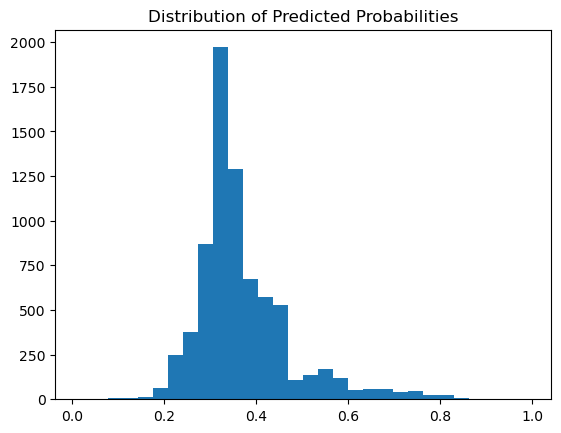

In [32]:
import matplotlib.pyplot as plt

plt.hist(y_prob, bins=30)
plt.title("Distribution of Predicted Probabilities")
plt.show()


# features based on time events

In [34]:
df_full

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,hours_since_open
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,0.116667
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,7.616667
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,10.216667
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,130.733333
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,0.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,2017-02-16 09:09:00,...,Do Not Notify,?,?,?,?,code 9,Resolved by 9,2017-02-16 09:53:00,2017-02-16 09:53:00,0.733333
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,Do Not Notify,?,?,?,?,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00,0.000000
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,Do Not Notify,?,?,?,?,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00,1.050000
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,Do Not Notify,?,?,?,?,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00,2.350000


In [35]:
df_full['opened_at'] = pd.to_datetime(df_full['opened_at'])
df_full['sys_updated_at'] = pd.to_datetime(df_full['sys_updated_at'])


In [37]:
# 48 hr cutoff

In [36]:
df_full['cutoff_48h'] = df_full['opened_at'] + pd.Timedelta(hours=48)


In [38]:
# filter rows within first 48 hrs

In [39]:
df_48h = df_full[df_full['sys_updated_at'] <= df_full['cutoff_48h']].copy()


In [40]:
df_48h = df_48h.sort_values(['number', 'sys_updated_at'])


In [41]:
print("Unique tickets in full data:", df_full['number'].nunique())
print("Unique tickets in 48h slice:", df_48h['number'].nunique())


Unique tickets in full data: 24918
Unique tickets in 48h slice: 24918


In [43]:
# Sort
df_48h = df_48h.sort_values(['number', 'sys_updated_at'])


In [44]:
# Time to first update
first_update = df_48h.groupby('number')['sys_updated_at'].transform('min')

df_48h['time_to_first_update'] = (
    first_update - df_48h['opened_at']
).dt.total_seconds() / 3600


In [49]:
df_full.groupby('number')['opened_at'].nunique().value_counts()


opened_at
1    24918
Name: count, dtype: int64

In [45]:
# Time between update
df_48h['time_diff'] = (
    df_48h.groupby('number')['sys_updated_at']
    .diff()
    .dt.total_seconds() / 3600
)


In [50]:
df_48h['time_diff']

0          NaN
1         7.50
2         2.60
4          NaN
5         0.55
          ... 
141707    0.00
141708     NaN
141709    1.05
141710    1.30
141711    0.00
Name: time_diff, Length: 79223, dtype: float64

In [46]:
# Aggregate to one row per ticket
features_48h = df_48h.groupby('number').agg(
    update_count_48h = ('sys_updated_at', 'count'),
    time_to_first_update = ('time_to_first_update', 'first'),
    avg_gap_48h = ('time_diff', 'mean'),
    max_gap_48h = ('time_diff', 'max')
).reset_index()



In [47]:
# Handle missing values
features_48h[['avg_gap_48h','max_gap_48h']] = \
    features_48h[['avg_gap_48h','max_gap_48h']].fillna(0)


In [48]:
features_48h.describe()


,update_count_48h,time_to_first_update,avg_gap_48h,max_gap_48h
count,24918.000000,24918.000000,24918.000000,24918.000000
mean,3.179348,0.085761,3.245907,6.917057
std,2.073493,0.230728,5.976954,10.741321
min,1.000000,-2.450000,0.000000,0.000000
25%,2.000000,0.000000,0.058333,0.066667
50%,3.000000,0.016667,0.438889,0.666667
75%,4.000000,0.100000,4.244792,12.450000
max,38.000000,19.100000,47.900000,47.900000


In [51]:
# Checking and printing

In [52]:
features_48h.head()


,number,update_count_48h,time_to_first_update,avg_gap_48h,max_gap_48h
0,INC0000045,3,0.116667,5.050000,7.500000
1,INC0000047,8,0.283333,4.130952,21.700000
2,INC0000057,6,0.266667,4.096667,16.783333
3,INC0000060,1,0.066667,0.000000,0.000000
4,INC0000062,7,0.466667,1.402778,4.383333


In [53]:
features_48h.describe()


,update_count_48h,time_to_first_update,avg_gap_48h,max_gap_48h
count,24918.000000,24918.000000,24918.000000,24918.000000
mean,3.179348,0.085761,3.245907,6.917057
std,2.073493,0.230728,5.976954,10.741321
min,1.000000,-2.450000,0.000000,0.000000
25%,2.000000,0.000000,0.058333,0.066667
50%,3.000000,0.016667,0.438889,0.666667
75%,4.000000,0.100000,4.244792,12.450000
max,38.000000,19.100000,47.900000,47.900000


In [54]:
features_48h.sample(1)


,number,update_count_48h,time_to_first_update,avg_gap_48h,max_gap_48h
22190,INC0031099,12,0.116667,3.065152,16.1


In [58]:
ticket_id = 'INC0031099'

df_48h[df_48h['number'] == ticket_id][['number','opened_at','sys_updated_at','time_to_first_update','time_diff']
]


,number,opened_at,sys_updated_at,time_to_first_update,time_diff
127262,INC0031099,2016-05-19 09:02:00,2016-05-19 09:09:00,0.116667,NaN
127263,INC0031099,2016-05-19 09:02:00,2016-05-19 16:04:00,0.116667,6.916667
127264,INC0031099,2016-05-19 09:02:00,2016-05-19 16:04:00,0.116667,0.000000
127265,INC0031099,2016-05-19 09:02:00,2016-05-19 16:04:00,0.116667,0.000000
127266,INC0031099,2016-05-19 09:02:00,2016-05-19 16:29:00,0.116667,0.416667
127267,INC0031099,2016-05-19 09:02:00,2016-05-19 16:29:00,0.116667,0.000000
127268,INC0031099,2016-05-19 09:02:00,2016-05-20 08:35:00,0.116667,16.100000
127269,INC0031099,2016-05-19 09:02:00,2016-05-20 08:36:00,0.116667,0.016667
127270,INC0031099,2016-05-19 09:02:00,2016-05-20 11:27:00,0.116667,2.850000
127271,INC0031099,2016-05-19 09:02:00,2016-05-20 11:27:00,0.116667,0.000000


In [66]:
features_48h = df_48h.groupby('number').agg(
    update_count_48h=('sys_updated_at','count'),
    time_to_first_update=('time_to_first_update','first'),
    avg_gap_48h=('time_diff','mean'),
    max_gap_48h=('time_diff','max')
).reset_index()

In [67]:
features_48h[features_48h['number'] == 'INC0031099']

,number,update_count_48h,time_to_first_update,avg_gap_48h,max_gap_48h
22190,INC0031099,12,0.116667,3.065152,16.1


In [73]:
df[['number','made_sla']].head()


,number,made_sla
0,INC0000045,True
1,INC0000045,True
2,INC0000045,True
3,INC0000045,True
4,INC0000047,True


In [74]:
df['breach'] = (~df['made_sla']).astype(int)


In [75]:
label_df = df.groupby('number')['breach'].max().reset_index()


In [76]:
final_df = features_48h.merge(label_df, on='number', how='inner')


In [77]:
final_df.groupby('breach')['max_gap_48h'].mean()


breach
0     6.234449
1    11.876114
Name: max_gap_48h, dtype: float64

In [78]:
final_df['silent_16h'] = (final_df['max_gap_48h'] >= 16).astype(int)

pd.crosstab(final_df['silent_16h'], final_df['breach'], normalize='index')


breach,0,1
silent_16h,,
0,0.668672,0.331328
1,0.506785,0.493215


In [79]:
final_df.groupby('breach')['update_count_48h'].mean()


breach
0    3.064798
1    3.377948
Name: update_count_48h, dtype: float64

In [80]:
final_df.groupby('breach')['time_to_first_update'].mean()


breach
0    0.067862
1    0.116793
Name: time_to_first_update, dtype: float64

In [81]:
final_df['breach'].value_counts(normalize=True)


breach
0    0.6342
1    0.3658
Name: proportion, dtype: float64

# Train model

In [82]:
X = final_df[['max_gap_48h',
              'avg_gap_48h',
              'update_count_48h',
              'time_to_first_update']]

y = final_df['breach']


In [92]:
X = X.copy()

X['max_gap_48h'] = X['max_gap_48h'].fillna(0)
X['avg_gap_48h'] = X['avg_gap_48h'].fillna(0)
X['update_count_48h'] = X['update_count_48h'].fillna(0)

# If no first update, treat as 48h delay
X['time_to_first_update'] = X['time_to_first_update'].fillna(48)


In [93]:
X.isna().sum()


max_gap_48h             0
avg_gap_48h             0
update_count_48h        0
time_to_first_update    0
dtype: int64

In [84]:
# Train rest split

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   # keeps class distribution consistent
)


In [85]:
# Scale Features

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
# Train Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)


LogisticRegression()

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[4335  406]
 [2313  422]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      4741
           1       0.51      0.15      0.24      2735

    accuracy                           0.64      7476
   macro avg       0.58      0.53      0.50      7476
weighted avg       0.60      0.64      0.57      7476


ROC-AUC Score:
0.6580282779610901


In [99]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred_custom = (y_prob > 0.35).astype(int)

print("Confusion Matrix (Threshold = 0.35):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report (Threshold = 0.35):")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix (Threshold = 0.35):
[[3275 1466]
 [1334 1401]]

Classification Report (Threshold = 0.35):
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      4741
           1       0.49      0.51      0.50      2735

    accuracy                           0.63      7476
   macro avg       0.60      0.60      0.60      7476
weighted avg       0.63      0.63      0.63      7476



In [100]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
3,time_to_first_update,0.262610
0,max_gap_48h,0.217645
1,avg_gap_48h,0.130350
2,update_count_48h,-0.001184
